# Usage Example: Waveform Toy MC

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import icae.toy.waveformMC as toy

ModuleNotFoundError: No module named 'icae'

In [3]:
import numpy as np
import pandas as pd
import numpy.testing as npt
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

In [211]:
# Math functions
def FWHM(X,Y, frac=2):
    """adapted from https://stackoverflow.com/questions/10582795/finding-the-full-width-half-maximum-of-a-peak"""
    d = Y - (max(Y) / frac)
    indexes = np.where(d > 0)[0]
    return abs(X[indexes[-1]] - X[indexes[0]])

### PDF: Event close to DOM

In [212]:
distance_to_DOM = 10 #m
angle_to_DOM = np.deg2rad(41)

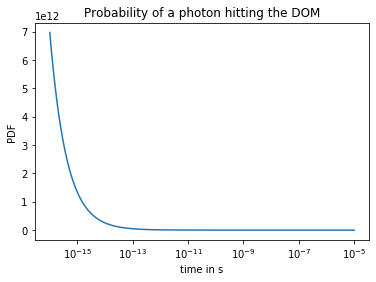

In [213]:
plt.title("Probability of a photon hitting the DOM")
# where t=0 is the fastest path possible (straight line from event site to DOM)

times = np.logspace(-16,-5,1000)
pdf = toy.pandel_PDF(times, distance_to_DOM, angle_to_DOM)

plt.xlabel("time in s")
plt.ylabel("PDF")
plt.xscale('log')
plt.plot(times, pdf);

In [214]:
integral = np.trapz(pdf,times)
missing = 1-integral
num_samples = 1e3
print(f"Of {num_samples} samples, {int(missing*num_samples)} sample(s) will lay outside of the calculated PDF.")

Of 1000.0 samples, 2 sample(s) will lay outside of the calculated PDF.


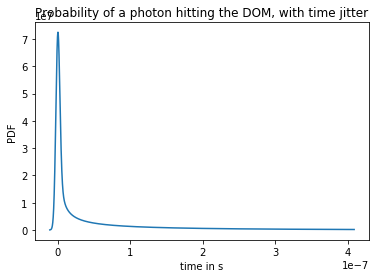

In [215]:
plt.title("Probability of a photon hitting the DOM, with time jitter")
# where t=0 is the fastest path possible (straight line from event site to DOM)

times, pdf = toy.pandel_convolved_PDF(420e-9, distance_to_DOM, angle_to_DOM)

plt.xlabel("time in s")
plt.ylabel("PDF")
plt.plot(times, pdf);

In [216]:
import scipy.signal as sig

In [223]:
sig.resample(pdf,128,).astype("int")

array([  -72965,  1331436, 18122218, 64032171, 60094589, 22517189,
       11485439,  7914568,  6997024,  5557245,  5234327,  4362562,
        4215341,  3613619,  3538454,  3091416,  3050756,  2702682,
        2679939,  2400085,  2386963,  2156752,  2148738,  1956172,
        1950656,  1787583,  1782986,  1643640,  1638974,  1519140,
        1513773,  1410288,  1403803,  1314239,  1306362,  1228819,
        1219365,  1152332,  1141176,  1083436,  1070493,  1021052,
        1006262,   964302,   947624,   912464,   893868,   864939,
         844402,   821224,   798726,   780894,   756417,   743587,
         717114,   708994,   680504,   676846,   646318,   646912,
         614321,   618990,   584307,   592904,   556095,   568499,
         529523,   545636,   504449,   524197,   480745,   504072,
         458296,   485168,   436998,   467399,   416756,   450691,
         397484,   434977,   379102,   420197,   361538,   406301,
         344722,   393242,   328590,   380983,   313079,   369

(-1e-07, 1e-07)

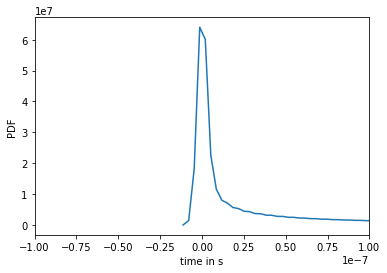

In [221]:
plt.plot(np.linspace(times.min(),times.max(),128), sig.resample(pdf,128,))
plt.xlabel("time in s")
plt.ylabel("PDF")
#plt.plot(times, pdf);
plt.xlim(-1e-7,1e-7)

In [185]:
FWHM(times,pdf)

7.013999999999941e-09

### PDF: Event far from DOM

In [186]:
distance_to_DOM = 160 #m
angle_to_DOM = np.deg2rad(41)

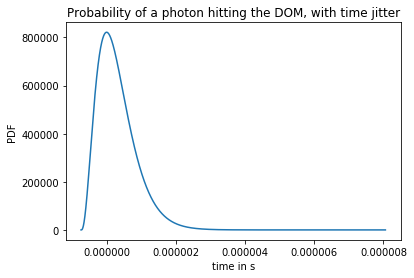

In [187]:
plt.title("Probability of a photon hitting the DOM, with time jitter")
# where t=0 is the fastest path possible (straight line from event site to DOM)

times, pdf = toy.pandel_convolved_PDF(10e-6, distance_to_DOM, angle_to_DOM)

plt.xlabel("time in s")
plt.ylabel("PDF")
plt.plot(times, pdf);

In [188]:
# Compare to DOM tests done in https://arxiv.org/abs/1002.2442
pulse_width = FWHM(times,pdf)
npt.assert_approx_equal(pulse_width,1e-6, significant=1)
print(pulse_width,"s")

1.1209999999999656e-06 s


## Generator Usage

In [189]:
sample_times = np.random.choice(times,p=pdf/pdf.sum(),size=10)

In [190]:
hist,edges = np.histogram(sample_times,bins=128,range=[times.min(),times.max()])

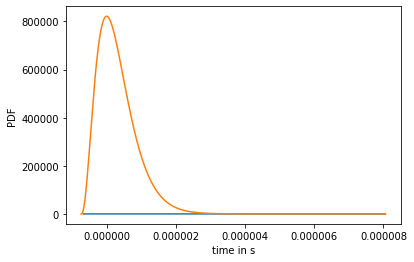

In [191]:
plt.xlabel("time in s")
plt.ylabel("PDF")
plt.plot(edges[1:],hist);
#plt.hist(sample_times,bins=100,density=True);
plt.plot(times, pdf);

In [192]:
distances_to_DOM = np.linspace(10, 50,num=10) #m
angles_to_DOM = np.deg2rad(np.linspace(0, 180,num=10))
mean_photons, std_photons = 1000, 300
photons_per_event = stats.norm(loc = mean_photons, scale = std_photons)

gen = toy.Generator(distances_to_DOM, angles_to_DOM, photons_per_event)

In [193]:
gen.generate_valid(100)
gen.generate_gaussian_reshaped(100,i,0.1,0.3)
gen.generate_double_pulse(100,i*200e-9,0.2)


Generating PDFs: 100%|██████████| 63/63 [00:00<00:00, 426.69it/s]

Drawing random samples: 100it [00:00, 3315.11it/s]

Generating PDFs: 100%|██████████| 62/62 [00:00<00:00, 358.86it/s]

Drawing random samples: 100it [00:00, 3323.06it/s]

Generating PDFs: 100%|██████████| 65/65 [00:00<00:00, 418.36it/s]

Drawing random samples: 100it [00:00, 3297.77it/s]


,MC_type,MC_name,d,η,photon_count,t_min,t_max,glitch_params_ID,t=0,t=1,...,t=118,t=119,t=120,t=121,t=122,t=123,t=124,t=125,t=126,t=127
0,2,double pulse,27.7778,0,580,0,4.2e-07,2,0,0,...,5,1,1,0,3,0,4,3,0,4
1,2,double pulse,23.3333,0,1055,0,4.2e-07,2,0,2,...,1,5,1,5,7,3,5,1,4,6
2,2,double pulse,41.1111,3.14159,1391,0,4.2e-07,2,0,1,...,9,11,17,8,3,9,11,5,3,11
3,2,double pulse,27.7778,2.0944,807,0,4.2e-07,2,0,0,...,1,6,3,2,2,7,4,4,2,1
4,2,double pulse,27.7778,0.698132,980,0,4.2e-07,2,0,0,...,5,6,2,2,2,4,4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,double pulse,27.7778,1.39626,599,0,4.2e-07,2,0,1,...,4,3,1,3,2,1,3,2,1,4
96,2,double pulse,27.7778,1.39626,636,0,4.2e-07,2,1,0,...,2,5,0,5,3,2,1,2,2,2
97,2,double pulse,41.1111,1.0472,539,0,4.2e-07,2,0,0,...,4,2,2,5,4,3,0,4,0,3
98,2,double pulse,32.2222,1.39626,1544,0,4.2e-07,2,0,2,...,7,3,8,7,8,9,10,5,9,8


In [194]:
df = gen.df_waveforms.infer_objects()
df.dtypes

MC_type            int64
MC_name         category
d                float64
η                float64
photon_count       int64
                  ...   
t=123              int64
t=124              int64
t=125              int64
t=126              int64
t=127              int64
Length: 136, dtype: object

In [195]:
gen.save("/tmp/test.hdf")

In [198]:
pd.read_hdf("/tmp/test.hdf",key="waveforms")

,MC_type,MC_name,d,η,photon_count,t_min,t_max,glitch_params_ID,t=0,t=1,...,t=118,t=119,t=120,t=121,t=122,t=123,t=124,t=125,t=126,t=127
0,0,valid,10.000000,1.047198,495,0,4.200000e-07,0,0,9,...,0,0,1,0,0,0,1,1,0,1
1,0,valid,41.111111,2.443461,685,0,4.200000e-07,0,0,0,...,2,5,5,2,4,3,4,4,4,1
2,0,valid,14.444444,1.396263,969,0,4.200000e-07,0,2,18,...,2,1,0,0,1,2,1,0,0,1
3,0,valid,10.000000,1.047198,886,0,4.200000e-07,0,2,24,...,0,0,1,0,0,1,0,0,1,1
4,0,valid,27.777778,1.396263,1335,0,4.200000e-07,0,0,6,...,0,4,3,1,5,2,6,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,double pulse,27.777778,1.396263,599,0,4.200000e-07,2,0,1,...,4,3,1,3,2,1,3,2,1,4
296,2,double pulse,27.777778,1.396263,636,0,4.200000e-07,2,1,0,...,2,5,0,5,3,2,1,2,2,2
297,2,double pulse,41.111111,1.047198,539,0,4.200000e-07,2,0,0,...,4,2,2,5,4,3,0,4,0,3
298,2,double pulse,32.222222,1.396263,1544,0,4.200000e-07,2,0,2,...,7,3,8,7,8,9,10,5,9,8


In [199]:
pd.read_hdf("/tmp/test.hdf",key="parameters")

,MC_type,MC_name,count,params
0,0,valid,100,{}
1,1,gaussian_reshaped,100,"{'mean': 1.1644210683062899, 'std': 0.1, 'impa..."
2,2,double pulse,100,"{'separation': 2.3288421366125796e-07, 'photon..."


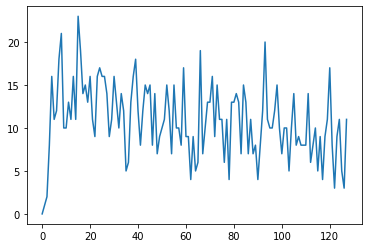

In [201]:
wf = gen.df_waveforms.loc[202]
photons = wf[[f"t={t}" for t in range(128)]].values
plt.plot(photons)

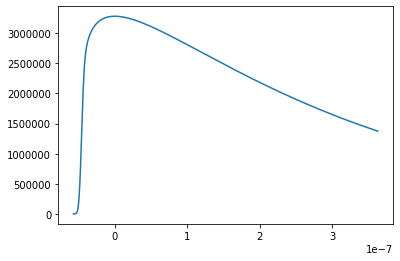

In [202]:
times, pdf = toy.pandel_convolved_PDF(wf.t_max,wf.d,wf.η)
plt.plot(times,pdf)

In [203]:
shift = np.searchsorted(times,100e-9)
shifted = np.roll(pdf,shift)
shifted[:shift] = 0

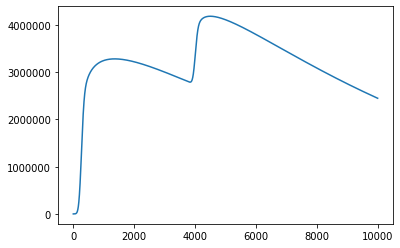

In [204]:
plt.plot(pdf+shifted*0.5)

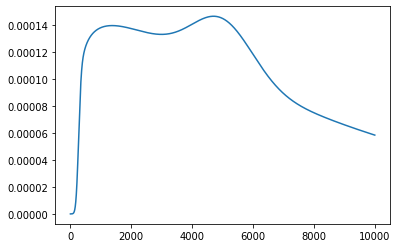

In [205]:
import scipy.stats
norm = scipy.stats.norm.pdf(np.linspace(0,1,num=len(times)),0.5,0.1)
#plt.plot(norm/norm.sum())
#plt.plot(pdf/pdf.sum())
plt.plot(pdf/pdf.sum()+norm/norm.sum()*0.1)